# Loan Defaulter Classifier

In consumer finance, lending money is a delicate balance between opportunity and risk. Loan providing companies often face challenges in lending to individuals with insufficient or non-existent credit history, thus facing the challenge of identifying potential customers who can responsibly manage their loans. This project aims to tackle that challenge by analysing historical data to identify patterns that can help predict which applicants are likely to default on their loans.

The lack of credit history information can lead to adverse outcomes, where some consumers exploit the situation and become defaulters. In this context, our project addresses two critical risks associated with loan approval decisions:
* Opportunity Loss: Failing to approve loans for applicants who are capable of repaying them results in missed business opportunities.
* Financial Loss: Approving loans for applicants likely to default can lead to significant financial losses for the company.

*PS: We would strongly recommend using the headings sections of this notebook on Jupyter Lab/Notebook for easier accessibility.*

## Team Members
* Shruti Gajipara 121233882 shruti01@umd.edu
* Aayush Verma 121331076 aver23@umd.edu
* Premal Shah 121293596 shah1305@umd.edu
* Asutosh Dalei 120997754 asutoshd@umd.edu

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

from collections import defaultdict

import os
import warnings
warnings.filterwarnings('ignore')
%autosave 30

Autosaving every 30 seconds


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import OneClassSVM, SVC

from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Datasets

In [9]:
# from google.colab import drive
# drive.mount("/content/drive")

In [10]:
dataPath = "/content/drive/MyDrive/Datasets/Loan-Defaulter-Classification/"
dataPath = r"C:\Users\asuto\Desktop\Work\Loan-Defaulter-Classification\datasets"
# dataPath = "/Users/asutoshdalei/Desktop/Work/Loan-Defaulter-Classification/datasets"
os.listdir(dataPath)

['application_data.csv',
 'columns_description.csv',
 'modelRecord.csv',
 'previous_application.csv']

In [11]:
colDesPath = r'/content/drive/MyDrive/Datasets/Loan-Defaulter-Classification/columns_description.csv'
appliPath = r'/content/drive/MyDrive/Datasets/Loan-Defaulter-Classification/application_data.csv'
prevAppliPath = r'/content/drive/MyDrive/Datasets/Loan-Defaulter-Classification/previous_application.csv'

colDesPath = r'C:\Users\asuto\Desktop\Work\Loan-Defaulter-Classification\datasets\columns_description.csv'
appliPath = r'C:\Users\asuto\Desktop\Work\Loan-Defaulter-Classification\datasets\application_data.csv'
prevAppliPath = r'C:\Users\asuto\Desktop\Work\Loan-Defaulter-Classification\datasets\previous_application.csv'

# colDesPath = r'/Users/asutoshdalei/Desktop/Work/Loan-Defaulter-Classification/datasets/columns_description.csv'
# appliPath = r'/Users/asutoshdalei/Desktop/Work/Loan-Defaulter-Classification/datasets/application_data.csv'
# prevAppliPath = r'/Users/asutoshdalei/Desktop/Work/Loan-Defaulter-Classification/datasets/previous_application.csv'


for i in [colDesPath,appliPath,prevAppliPath]:
    print(str(i),":",os.path.getsize(i)/1e6,'mb')

C:\Users\asuto\Desktop\Work\Loan-Defaulter-Classification\datasets\columns_description.csv : 0.028348 mb
C:\Users\asuto\Desktop\Work\Loan-Defaulter-Classification\datasets\application_data.csv : 166.13337 mb
C:\Users\asuto\Desktop\Work\Loan-Defaulter-Classification\datasets\previous_application.csv : 404.973293 mb


In [12]:
%%time
columnDescription = pd.read_csv(colDesPath).drop(columns = ['Unnamed: 0'])
columnDescription.head()

CPU times: total: 0 ns
Wall time: 27.5 ms


,Table,Row,Description,Special
0,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_data,CODE_GENDER,Gender of the client,NaN
4,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [13]:
columnDescription.Table.value_counts()

Table
application_data            122
previous_application.csv     38
Name: count, dtype: int64

In [14]:
%%time
appData = pd.read_csv(appliPath)
print(appData.shape)
appData.head()

(307511, 122)
CPU times: total: 2.73 s
Wall time: 2.75 s


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
defiFnx = lambda col,table='application_data': columnDescription[(columnDescription.Row == col) & (columnDescription.Table==table)]['Description'].item()

## Primary Preprocessing & Data Manipulation
**Based out on prior EDA work**

In this stage, we will perform the following preprocessing tasks:

- **Handle missing values**: Impute or remove missing data based on feature type.
- **Feature engineering**: Create new features if necessary (e.g., interaction terms or polynomial features).
- **Feature selection**: Remove highly correlated or irrelevant features to reduce dimensionality.

These steps aim to transform the data into a suitable format for modeling.


In [16]:
# Feature Creation: missingData. To indicate the % of datapoints missing in the row.
appData = appData.assign(missingData = appData.isna().mean(axis=1)*100)

In [17]:
# Correcting DAYS_EMPLOYED to work experience
appData['workExperience'] = (-appData['DAYS_EMPLOYED']/365).astype('float')
appData.drop(columns=['DAYS_EMPLOYED'],inplace=True)

#Number of cases where workExperience is less that 0. Since that is not possible, we will replace those rows with 0.
print("Number of cases with workEx < 0:", appData[appData['workExperience'] < 0].shape[0])

idx = appData[appData['workExperience'] < 0].index
appData.iloc[idx,appData.columns.get_loc('workExperience')] = 0

print("Number of cases with workEx < 0 after trasformation:", appData[appData['workExperience'] < 0].shape[0])

Number of cases with workEx < 0: 55374
Number of cases with workEx < 0 after trasformation: 0


In [18]:
# Dropping rows with wrong gender
appData = appData[appData['CODE_GENDER'] != 'XNA']

In [19]:
%%time
commCols = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
appData['mobileCommunication'] = appData[commCols].sum(axis=1)#/len(commCols)
appData.drop(columns = commCols, inplace=True)

CPU times: total: 156 ms
Wall time: 142 ms


In [20]:
%%time
regCols = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
appData['region'] = appData[regCols].mean(axis=1)
appData.drop(columns = regCols, inplace=True)

CPU times: total: 141 ms
Wall time: 130 ms


In [21]:
%%time
amtCols = [col for col in appData.columns if 'AMT_REQ_CREDIT_BUREAU' in col]
appData['creditB'] = appData[amtCols].sum(axis=1)
appData.drop(columns = amtCols, inplace=True)

CPU times: total: 172 ms
Wall time: 166 ms


In [22]:
docCols = [col for col in appData.columns  if 'DOCU' in col]
dropCols = []
for i in docCols:
    if i != 'FLAG_DOCUMENT_3':
        dropCols.append(i)
appData.drop(columns = dropCols, inplace=True)

In [23]:
idx = appData[appData['OWN_CAR_AGE'].notna()].index
appData.loc[idx,'OWN_CAR_AGE'] = 1

In [24]:
appData.isna().mean()

SK_ID_CURR             0.0
TARGET                 0.0
NAME_CONTRACT_TYPE     0.0
CODE_GENDER            0.0
FLAG_OWN_CAR           0.0
                      ... 
missingData            0.0
workExperience         0.0
mobileCommunication    0.0
region                 0.0
creditB                0.0
Length: 93, dtype: float64

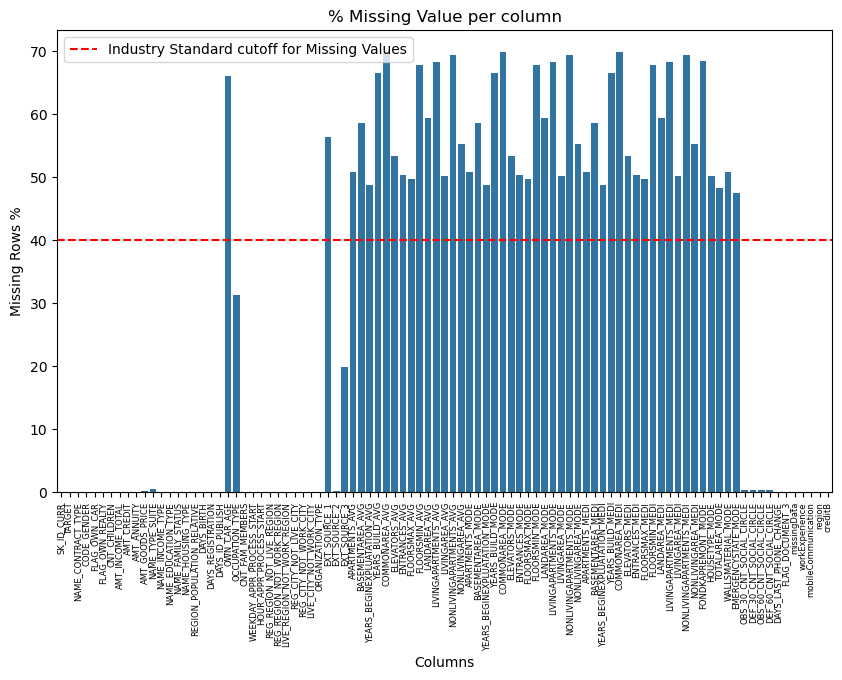

In [25]:
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=appData.isna().mean()*100)
plt.axhline(y=40,color='red',linestyle = '--',label='Industry Standard cutoff for Missing Values')
plt.legend()
plt.xticks(rotation=90,fontsize=6)
plt.title('% Missing Value per column')
plt.xlabel('Columns')
plt.ylabel('Missing Rows %')
plt.show()

In [26]:
missingDataCol = appData.isna().mean()
missingDataCol[missingDataCol>0.4]

OWN_CAR_AGE                     0.659910
EXT_SOURCE_1                    0.563812
APARTMENTS_AVG                  0.507501
BASEMENTAREA_AVG                0.585164
YEARS_BEGINEXPLUATATION_AVG     0.487813
YEARS_BUILD_AVG                 0.664980
COMMONAREA_AVG                  0.698722
ELEVATORS_AVG                   0.532963
ENTRANCES_AVG                   0.503491
FLOORSMAX_AVG                   0.497611
FLOORSMIN_AVG                   0.678489
LANDAREA_AVG                    0.593769
LIVINGAPARTMENTS_AVG            0.683552
LIVINGAREA_AVG                  0.501937
NONLIVINGAPARTMENTS_AVG         0.694332
NONLIVINGAREA_AVG               0.551792
APARTMENTS_MODE                 0.507501
BASEMENTAREA_MODE               0.585164
YEARS_BEGINEXPLUATATION_MODE    0.487813
YEARS_BUILD_MODE                0.664980
COMMONAREA_MODE                 0.698722
ELEVATORS_MODE                  0.532963
ENTRANCES_MODE                  0.503491
FLOORSMAX_MODE                  0.497611
FLOORSMIN_MODE  

In [27]:
morethan_40percent_missing = missingDataCol[(missingDataCol>0.4)].index.tolist()
print(morethan_40percent_missing)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

### Realty Columns
* These columns are linked to housing details of applicants.
* The columns have a missing data percentage of more than 40 % and have poor correlation with the TARGET variable.
* Will be dropping them.

In [28]:
realty_ = []
for i in morethan_40percent_missing:
    if 'AVG' in i:
        realty_.append(i)
realty_

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG']

In [29]:
suspect_col = realty_ + ['TARGET']
suspect_corr = appData[suspect_col].corr()
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(suspect_corr,xticklabels=suspect_corr.columns,yticklabels=suspect_corr.columns,annot = True,cmap ="RdYlGn",linewidth=1)

In [30]:
suspect_corr

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,TARGET
APARTMENTS_AVG,1.000000,0.679390,0.100099,0.340785,0.538898,0.836957,0.611237,0.618741,0.444713,0.496849,0.943952,0.913618,0.194113,0.299716,-0.029502
BASEMENTAREA_AVG,0.679390,1.000000,0.085947,0.248602,0.405457,0.564909,0.651159,0.329841,0.220915,0.467658,0.646778,0.692893,0.095419,0.266347,-0.022747
YEARS_BEGINEXPLUATATION_AVG,0.100099,0.085947,1.000000,0.483559,0.091481,0.078922,0.042074,0.127574,0.167157,0.073915,0.146118,0.092737,0.034980,0.009665,-0.009727
YEARS_BUILD_AVG,0.340785,0.248602,0.483559,1.000000,0.232254,0.343324,0.090584,0.519204,0.359553,0.180616,0.333937,0.355669,0.070932,0.127707,-0.022150
COMMONAREA_AVG,0.538898,0.405457,0.091481,0.232254,1.000000,0.522164,0.326261,0.404011,0.295654,0.257044,0.533101,0.547029,0.105581,0.227613,-0.018551
ELEVATORS_AVG,0.836957,0.564909,0.078922,0.343324,0.522164,1.000000,0.405201,0.680076,0.511255,0.375277,0.811785,0.867775,0.121666,0.283365,-0.034202
ENTRANCES_AVG,0.611237,0.651159,0.042074,0.090584,0.326261,0.405201,1.000000,0.088696,0.035624,0.508253,0.566052,0.618878,0.061532,0.165726,-0.019175
FLOORSMAX_AVG,0.618741,0.329841,0.127574,0.519204,0.404011,0.680076,0.088696,1.000000,0.742436,0.218859,0.589757,0.630572,0.113327,0.253841,-0.044009
FLOORSMIN_AVG,0.444713,0.220915,0.167157,0.359553,0.295654,0.511255,0.035624,0.742436,1.000000,0.148220,0.438711,0.466514,0.075798,0.153109,-0.033619
LANDAREA_AVG,0.496849,0.467658,0.073915,0.180616,0.257044,0.375277,0.508253,0.218859,0.148220,1.000000,0.420081,0.501568,0.065854,0.163536,-0.010887


In [31]:
realty_ = []
for i in morethan_40percent_missing:
    if ('AVG' in i) or ('MEDI' in i) or ('MODE' in i):
        realty_.append(i)

appData.drop(columns = realty_, inplace=True)
print(appData.shape)

(307507, 46)


### Social Circle Columns

* These columns are linked to the social circle of the applicant.
* The columns have a poor correlation with the TARGET variable.
* Will be dropping them.

In [32]:
suspect_col = []
for i in appData.columns:
    if 'SOC' in i:
        suspect_col.append(i)
        print(f"{i}: {defiFnx(i)}")

OBS_30_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings with observable 30 DPD (days past due) default
DEF_30_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
OBS_60_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings with observable 60 DPD (days past due) default
DEF_60_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings defaulted on 60 (days past due) DPD


In [33]:
suspect_corr = appData[suspect_col+['TARGET']].corr()

fig = plt.figure(figsize=(5,4))
ax = sns.heatmap(suspect_corr,xticklabels=suspect_corr.columns,yticklabels=suspect_corr.columns,annot = True,cmap ="RdYlGn",linewidth=1)

In [34]:
appData.drop(columns = suspect_col, inplace=True)
print(appData.shape)

(307507, 42)


### External Datasource Columns

* These columns are linked to external data sources.
* The columns have a poor correlation with the TARGET variable.
* Will be dropping them.

In [35]:
suspect_col = []
for i in appData.columns:
    if 'EXT' in i:
        suspect_col.append(i)
        print(f"{i}: {defiFnx(i)}")

EXT_SOURCE_1: Normalized score from external data source
EXT_SOURCE_2: Normalized score from external data source
EXT_SOURCE_3: Normalized score from external data source


In [36]:
suspect_corr = appData[suspect_col+['TARGET']].corr()

fig = plt.figure(figsize=(5,4))
ax = sns.heatmap(suspect_corr,xticklabels=suspect_corr.columns,yticklabels=suspect_corr.columns,annot = True,cmap ="RdYlGn",linewidth=1)

In [37]:
appData.drop(columns = suspect_col, inplace=True)
print(appData.shape)

(307507, 39)


### Fixing Day & Age Related Columns

In [38]:
suspect_col = []
for i in appData.columns:
    if 'DAYS' in i:
        suspect_col.append(i)
        print(f"{i}: {defiFnx(i)}")

DAYS_BIRTH: Client's age in days at the time of application
DAYS_REGISTRATION: How many days before the application did client change his registration
DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan
DAYS_LAST_PHONE_CHANGE: How many days before application did client change phone


In [39]:
appData[suspect_col]

,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-3648.0,-2120,-1134.0
1,-16765,-1186.0,-291,-828.0
2,-19046,-4260.0,-2531,-815.0
3,-19005,-9833.0,-2437,-617.0
4,-19932,-4311.0,-3458,-1106.0
...,...,...,...,...
307506,-9327,-8456.0,-1982,-273.0
307507,-20775,-4388.0,-4090,0.0
307508,-14966,-6737.0,-5150,-1909.0
307509,-11961,-2562.0,-931,-322.0


In [40]:
%%time
for col in suspect_col:
    appData[col] = (-appData[col]/365).astype('float')

CPU times: total: 15.6 ms
Wall time: 12.8 ms


In [41]:
appData['OWN_CAR_AGE'].value_counts(dropna=False,normalize=True)

OWN_CAR_AGE
NaN    0.65991
1.0    0.34009
Name: proportion, dtype: float64

In [42]:
appData.drop(columns = ['OWN_CAR_AGE'],inplace=True)

---
## Columns Under Consideration


In [43]:
print('The shape of dataset after the primary preprocessing stage is as follows:')
print(f'Number of Rows: {appData.shape[0]}, Number of Columns: {appData.shape[1]}')

The shape of dataset after the primary preprocessing stage is as follows:
Number of Rows: 307507, Number of Columns: 38


In [44]:
appData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,missingData,workExperience,mobileCommunication,region,creditB
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,3.106849,1,0.819672,1.745205,4,2.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,School,2.268493,1,1.639344,3.254795,4,1.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,Government,2.232877,0,39.344262,0.616438,5,2.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,Business Entity Type 3,1.690411,1,45.901639,8.326027,3,2.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,1,Religion,3.030137,0,40.983607,8.323288,3,2.0,0.0


In [45]:
appData.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   NAME_CONTRACT_TYPE           307507 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   CNT_CHILDREN                 307507 non-null  int64  
 7   AMT_INCOME_TOTAL             307507 non-null  float64
 8   AMT_CREDIT                   307507 non-null  float64
 9   AMT_ANNUITY                  307495 non-null  float64
 10  AMT_GOODS_PRICE              307229 non-null  float64
 11  NAME_TYPE_SUITE              306215 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13  NAME

In [46]:
appData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,missingData,workExperience,mobileCommunication,region,creditB
count,307507.000000,307507.00000,307507.000000,3.075070e+05,3.075070e+05,307495.000000,3.072290e+05,307507.000000,307507.000000,307507.000000,...,307507.000000,307507.000000,307507.000000,307506.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000
mean,278181.527256,0.08073,0.417047,1.687977e+05,5.990286e+05,27108.666786,5.383977e+05,0.020868,43.937061,13.660634,...,0.078174,0.230457,0.179557,2.637974,0.710033,24.396051,5.355672,3.355153,2.041989,2.145655
std,102790.132982,0.27242,0.722119,2.371246e+05,4.024926e+05,14493.798379,3.694472e+05,0.013831,11.956116,9.651734,...,0.268445,0.421126,0.383819,2.265237,0.453748,17.147006,6.320649,0.865273,0.499630,2.290849
min,100002.000000,0.00000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.517808,-0.000000,...,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,189146.500000,0.00000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.008219,5.506849,...,0.000000,0.000000,0.000000,0.750685,0.000000,4.098361,0.791781,3.000000,2.000000,0.000000
50%,278203.000000,0.00000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.150685,12.339726,...,0.000000,0.000000,0.000000,2.073973,1.000000,29.508197,3.323288,3.000000,2.000000,2.000000
75%,367143.500000,0.00000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.923288,20.491781,...,0.000000,0.000000,0.000000,4.301370,1.000000,40.163934,7.561644,4.000000,2.000000,3.000000
max,456255.000000,1.00000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.120548,67.594521,...,1.000000,1.000000,1.000000,11.758904,1.000000,50.000000,49.073973,6.000000,3.000000,262.000000


**Primary Preprocessing Complete**

---


## Secondary Preprocessing

In this stage, we will perform the following preprocessing tasks:

- **Handle missing values**: Impute or remove missing data based on feature type.
- **Scale/Normalize continuous variables**: Apply standardization (e.g., Z-score) or normalization (e.g., Min-Max scaling) for continuous features.
- **Encode categorical variables**: Use one-hot encoding or label encoding to convert categorical features into numerical format.
- **Outlier detection and treatment**: Identify and handle outliers using methods like Z-score or IQR.

These steps aim to transform the data into a suitable format for modeling.


In [47]:
appData['NAME_CONTRACT_TYPE'].replace({'Cash loans':'cash','Revolving loans':'revolve'},inplace=True)

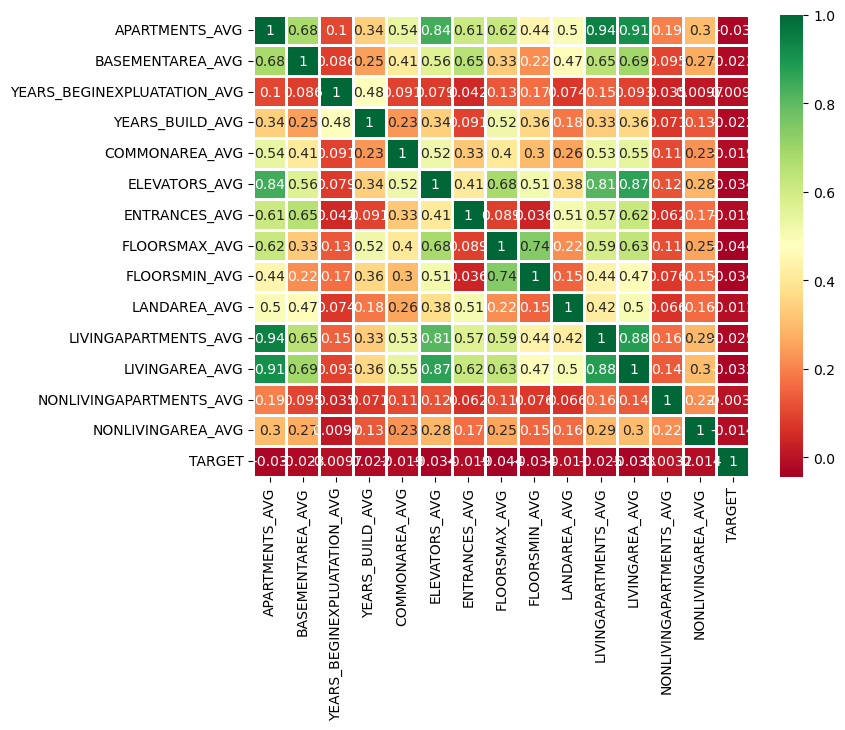

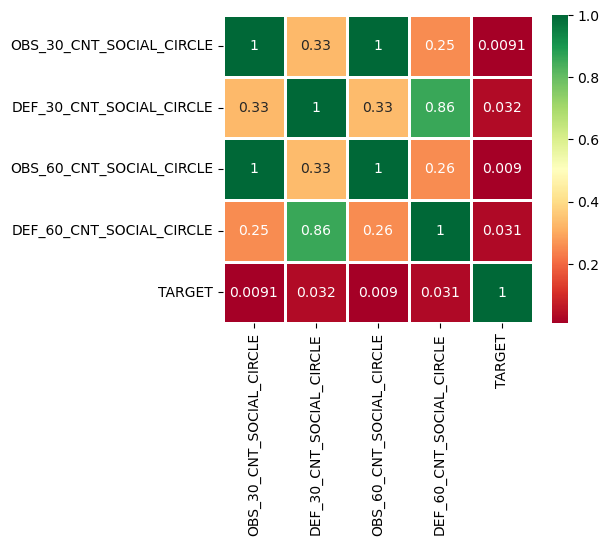

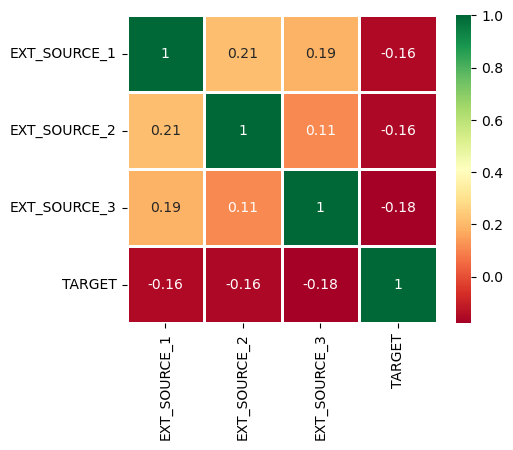

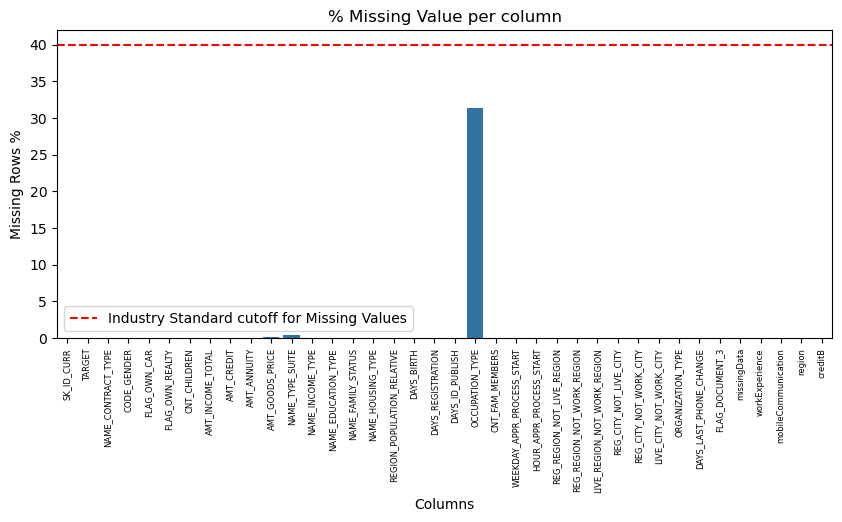

In [48]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(data=appData.isna().mean()*100)
plt.axhline(y=40,color='red',linestyle = '--',label='Industry Standard cutoff for Missing Values')
plt.legend()
plt.xticks(rotation=90,fontsize=6)
plt.title('% Missing Value per column')
plt.xlabel('Columns')
plt.ylabel('Missing Rows %')
plt.show()

In [49]:
appData.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96389
CNT_FAM_MEMBERS                    2
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
R

### Occupation Type
We can replace the NaN with 'Unknown'

In [50]:
defiFnx('OCCUPATION_TYPE')

'What kind of occupation does the client have'

In [51]:
appData['OCCUPATION_TYPE'].value_counts(dropna = False)

OCCUPATION_TYPE
NaN                      96389
Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [52]:
appData['OCCUPATION_TYPE'].fillna(value = 'Unkown',inplace=True)

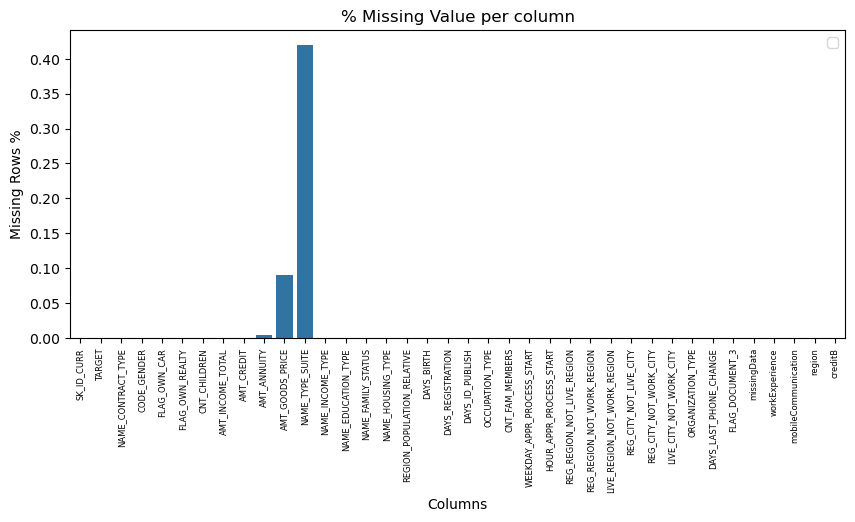

In [53]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(data=appData.isna().mean()*100)
# plt.axhline(y=40,color='red',linestyle = '--',label='Industry Standard cutoff for Missing Values')
plt.legend()
plt.xticks(rotation=90,fontsize=6)
plt.title('% Missing Value per column')
plt.xlabel('Columns')
plt.ylabel('Missing Rows %')
plt.show()

### Application Attendance
* We will merge Family, Spouse/Partner and Children into a single category
* We will merge OtherA/B, Group and NaN into others
* The rest remains the same

In [54]:
defiFnx('NAME_TYPE_SUITE')

'Who was accompanying client when he was applying for the loan'

In [55]:
appData['NAME_TYPE_SUITE'].value_counts(dropna=False,normalize=True)

NAME_TYPE_SUITE
Unaccompanied      0.808186
Family             0.130560
Spouse, partner    0.036975
Children           0.010624
Other_B            0.005756
NaN                0.004202
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64

In [56]:
appData['NAME_TYPE_SUITE'].replace(to_replace=['Spouse, partner','Children'],value='Family',inplace=True)
appData['NAME_TYPE_SUITE'].replace(to_replace=['Other_A', 'Other_B','Group of people'],value='Others',inplace=True)
appData['NAME_TYPE_SUITE'].fillna('Others',inplace=True)

appData['NAME_TYPE_SUITE'].value_counts(dropna=False,normalize=True)

NAME_TYPE_SUITE
Unaccompanied    0.808186
Family           0.178159
Others           0.013655
Name: proportion, dtype: float64

### Goods Price
* Will be replaced by the mean value of the distribution

In [57]:
defiFnx('AMT_GOODS_PRICE')

'For consumer loans it is the price of the goods for which the loan is given'

In [58]:
appData['AMT_GOODS_PRICE'].isna().sum()

278

In [59]:
appData['AMT_GOODS_PRICE'].describe()

count    3.072290e+05
mean     5.383977e+05
std      3.694472e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [60]:
appData['AMT_GOODS_PRICE'].interpolate(inplace=True)
appData['AMT_GOODS_PRICE'].isna().sum()

0

In [61]:
tt = appData.isna().sum()
tt[tt>0]

AMT_ANNUITY               12
CNT_FAM_MEMBERS            2
DAYS_LAST_PHONE_CHANGE     1
dtype: int64

### Family Member Count, Annuity & Phone Change
* We can drop the rows belonging to these columns and are NaN.
* Annunity is an important parameter in loan systems.
* The remaining columns are more or less insignificant for the target column and miniscule in number.


In [62]:
appData.dropna(inplace=True)

In [63]:
appData.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 307492 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307492 non-null  int64  
 1   TARGET                       307492 non-null  int64  
 2   NAME_CONTRACT_TYPE           307492 non-null  object 
 3   CODE_GENDER                  307492 non-null  object 
 4   FLAG_OWN_CAR                 307492 non-null  object 
 5   FLAG_OWN_REALTY              307492 non-null  object 
 6   CNT_CHILDREN                 307492 non-null  int64  
 7   AMT_INCOME_TOTAL             307492 non-null  float64
 8   AMT_CREDIT                   307492 non-null  float64
 9   AMT_ANNUITY                  307492 non-null  float64
 10  AMT_GOODS_PRICE              307492 non-null  float64
 11  NAME_TYPE_SUITE              307492 non-null  object 
 12  NAME_INCOME_TYPE             307492 non-null  object 
 13  NAME

### Treating Categorical Variables
* Categorical variables with less than 3 unique values will be processed with OneHotEncoding
* The rest will be LabelEncoded

In [64]:
appData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,missingData,workExperience,mobileCommunication,region,creditB
0,100002,1,cash,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,3.106849,1,0.819672,1.745205,4,2.0,1.0
1,100003,0,cash,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,School,2.268493,1,1.639344,3.254795,4,1.0,0.0
2,100004,0,revolve,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,Government,2.232877,0,39.344262,0.616438,5,2.0,0.0
3,100006,0,cash,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,Business Entity Type 3,1.690411,1,45.901639,8.326027,3,2.0,0.0
4,100007,0,cash,M,N,Y,0,121500.0,513000.0,21865.5,...,1,1,Religion,3.030137,0,40.983607,8.323288,3,2.0,0.0


In [65]:
oneHotCol,labelEncCol = [],[]
for col,col_d in zip(appData.columns,appData.dtypes):
    if col_d == 'object':
        print(f"Column Name: {col}, Num Unique Values: {appData[col].nunique()}")
        if appData[col].nunique()<3:
            oneHotCol.append(col)
        else:
            labelEncCol.append(col)

Column Name: NAME_CONTRACT_TYPE, Num Unique Values: 2
Column Name: CODE_GENDER, Num Unique Values: 2
Column Name: FLAG_OWN_CAR, Num Unique Values: 2
Column Name: FLAG_OWN_REALTY, Num Unique Values: 2
Column Name: NAME_TYPE_SUITE, Num Unique Values: 3
Column Name: NAME_INCOME_TYPE, Num Unique Values: 8
Column Name: NAME_EDUCATION_TYPE, Num Unique Values: 5
Column Name: NAME_FAMILY_STATUS, Num Unique Values: 5
Column Name: NAME_HOUSING_TYPE, Num Unique Values: 6
Column Name: OCCUPATION_TYPE, Num Unique Values: 19
Column Name: WEEKDAY_APPR_PROCESS_START, Num Unique Values: 7
Column Name: ORGANIZATION_TYPE, Num Unique Values: 58


In [66]:
print(f"Columns for Label Encoding: {labelEncCol}\n")
print(f"Columns for OneHot Encoding: {oneHotCol}")


Columns for Label Encoding: ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

Columns for OneHot Encoding: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']


#### Label Encoding

In [67]:
encoderMap = defaultdict(LabelEncoder)

In [68]:
appData[labelEncCol] = appData[labelEncCol].apply(lambda x: encoderMap[x.name].fit_transform(x))

In [69]:
# # To inverse transform the encoding.
# appData[labelEncCol].apply(lambda x: encoderMap[x.name].inverse_transform(x))

#### OneHot Encoding

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
data = pd.get_dummies(appData,columns=oneHotCol,prefix=['Contract','GENDER','CAR','REALTY'],dtype=float)
# --- Variable Reset Tag

**Secondary Preprocessing Complete**

---


## Minority Class Identification
**Plan Overview:**
The goal is to identify the minority class (target class) in imbalanced datasets using various one-class classification algorithms.

**Algorithm Breakdown:**

1. **Gaussian Mixture Model (GMM)**  
   A probabilistic model that assumes the data is generated from a mixture of Gaussian distributions, used to detect outliers as data points with low likelihood under the model.

2. **Clustering-Based Methods (e.g., DBSCAN)**  
   Uses clustering techniques to group normal data points, with anomalies identified as points not belonging to any cluster.

3. **One-Class Support Vector Machine (One-Class SVM)**  
   Learns a boundary around the target class by finding the smallest region that contains the majority of the data, treating points outside as outliers.

4. **Isolation Forest**  
   An ensemble method that isolates anomalies by constructing random trees, with anomalies requiring fewer splits to be isolated.

**Next Steps:**
1. Evaluate each algorithm based on the specific characteristics of the dataset (e.g., data dimensionality, density of target class).
2. Fine-tune hyperparameters for each algorithm to optimize performance.
3. Compare the results using metrics like Precision, Recall, F1-Score, and AUC to evaluate the effectiveness of each algorithm in detecting the minority class.



In [72]:
print('The shape of dataset after the data preprocessing stage is as follows:')
print(f'Number of Rows: {data.shape[0]}, Number of Columns: {data.shape[1]}')

The shape of dataset after the data preprocessing stage is as follows:
Number of Rows: 307492, Number of Columns: 42


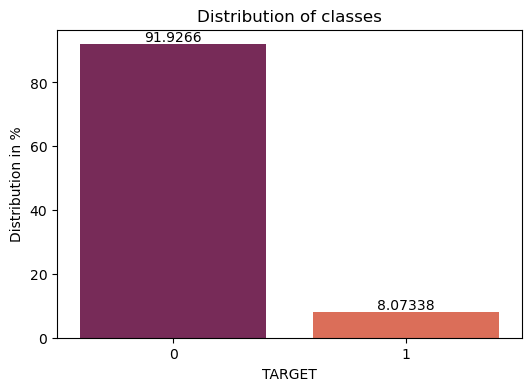

In [73]:
plt.figure(figsize = (6,4),dpi=100)
ax = sns.barplot(data.TARGET.value_counts(normalize=True)*100,palette='rocket')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Distribution of classes")
plt.ylabel("Distribution in %")
plt.show()

### Training and Test Data Creation
Since our data is heavily imbalanced and the plan is to perform one class classification, we will be dealing with just the minority class and an equivalent of the majority class

In [74]:
SEED = 42

In [75]:
data.TARGET.value_counts(normalize=False)

TARGET
0    282667
1     24825
Name: count, dtype: int64

In [76]:
%%time

# Approximating to 24825 to 25000 for the majority class
dtv1 = data[data['TARGET'] == 0].sample(25000,random_state=SEED)
dtv2 = data[data['TARGET'] == 1]
print("Majority class:", dtv1.shape,", Minority class:", dtv2.shape)

datav = pd.concat([dtv1,dtv2],axis=0).sample(frac = 1, random_state = SEED)

print("Merged Data Shape:", datav.shape)

Majority class: (25000, 42) , Minority class: (24825, 42)
Merged Data Shape: (49825, 42)
CPU times: total: 78.1 ms
Wall time: 79.3 ms


In [77]:
datav.TARGET.value_counts(normalize=True)

TARGET
0    0.501756
1    0.498244
Name: proportion, dtype: float64

In [78]:
datav.iloc[:,1:].head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,region,creditB,Contract_cash,Contract_revolve,GENDER_F,GENDER_M,CAR_N,CAR_Y,REALTY_N,REALTY_Y
246975,1,1,135000.0,1256400.0,40657.5,900000.0,0,7,4,1,...,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
88006,1,0,247500.0,315000.0,31153.5,315000.0,2,7,4,1,...,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
58991,1,0,225000.0,414792.0,18400.5,315000.0,2,7,4,1,...,2.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
239374,1,0,225000.0,675000.0,26284.5,675000.0,2,7,4,1,...,2.0,6.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
128512,0,0,31500.0,85320.0,6871.5,67500.0,0,7,4,3,...,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [79]:
# X & Y data along with standardization
xdata = datav.iloc[:,2:]
ydata = datav.iloc[:,1]

scaler = StandardScaler()
xdata_scaled = scaler.fit_transform(xdata)

In [80]:
xtrain,xtest,ytrain,ytest = train_test_split(xdata_scaled,ydata,test_size=0.2,random_state=SEED)

for i in [xtrain,ytrain,xtest,ytest]:
    print(i.shape)

(39860, 40)
(39860,)
(9965, 40)
(9965,)


In [81]:
# One Class
idx = ytrain[ytrain == 1].index
xtrainOneClass = xdata.loc[idx]

xtrainOC_Scaled = scaler.transform(xtrainOneClass)

In [82]:
dataPath

'C:\\Users\\asuto\\Desktop\\Work\\Loan-Defaulter-Classification\\datasets'

In [83]:
# Helper Functions

if 'modelRecord.csv' in os.listdir(dataPath):
  modelRecord = pd.read_csv(dataPath+'/'+'modelRecord.csv')
else:
  modelRecord = pd.DataFrame({'ModelName':[],'testAccuracy':[],'testF1':[],'testPrecision':[],'testRecall':[]})
  modelRecord.to_csv(dataPath+'/'+'modelRecord.csv',index=False)

def resultRecordFnx(report,modelname,modelRecord=modelRecord):
  '''
  Feed classification report, modelname
  '''
  acc,pre,rec,f1 = report['accuracy'],report['macro avg']['precision'],report['macro avg']['recall'],report['macro avg']['f1-score']
  if modelname in modelRecord['ModelName'].values:
    modelRecord.loc[modelRecord['ModelName'] == modelname,:] = [modelname,acc,f1,pre,rec]
  else:
    modelRecord.loc[len(modelRecord)] = {'ModelName':modelname,'testAccuracy':acc,'testF1':f1,'testPrecision':pre,'testRecall':rec}
  modelRecord.to_csv(dataPath+'/'+'modelRecord.csv',index=False)

def resultAnalysisFnx(ytrue,ypred):
    print(classification_report(ytrue,ypred))

    conf_matrix = confusion_matrix(ytrue, ypred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues', cbar=False,
                xticklabels=['Predicted Non-Defalter', 'Predicted Defaulter'],
                yticklabels=['True Non-Defaulter', 'True Defalter'])
    # sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return classification_report(ytrue,ypred,output_dict=True)

In [84]:
modelRecord

,ModelName,testAccuracy,testF1,testPrecision,testRecall
0,oneSVM_rbf,0.531962,0.531380,0.532233,0.532061
1,oneSVM_poly3,0.513899,0.513549,0.514019,0.513975
2,SVM_lin,0.622679,0.622644,0.622770,0.622710
3,SVM_poly3,0.604917,0.604916,0.604930,0.604927
4,SVM_poly4,0.596588,0.595782,0.597200,0.596471
5,SVM_rbf,0.620070,0.619880,0.620406,0.620135
6,IsoFor,0.528249,0.504077,0.534250,0.527655
7,DecTre_vanilla,0.548319,0.548279,0.548371,0.548349
8,DecTre_depth100,0.548319,0.548279,0.548371,0.548349
9,oneSVM_rev_rbf,0.490918,0.490826,0.490950,0.490958


### One Class SVM

In [ ]:
%%time
# One Class Classification

## RBF Kernel
clf = OneClassSVM(kernel='rbf', gamma='auto').fit(xtrainOC_Scaled)

# Predicting on test data
ypred = clf.predict(xtest)
ypred[ypred == -1] = 0

In [ ]:
rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'oneSVM_rbf')

In [ ]:
%%time
## Polynomial Kernel
clf = OneClassSVM(kernel='poly', degree=3, gamma='auto').fit(xtrainOC_Scaled)

# Predicting on test data
ypred = clf.predict(xtest)
ypred[ypred == -1] = 0

rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'oneSVM_poly3')

### Isolation Forest

In [ ]:
%%time
# Isolation Forest for One Class
clf = IsolationForest(n_estimators=500,random_state=SEED,n_jobs=-1).fit(xtrainOC_Scaled)

# Predicting on test data
ypred = clf.predict(xtest)
ypred[ypred == -1] = 0

In [ ]:
rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'IsoFor')

## Majority Class Identification

In [ ]:
# One Class
idx = ytrain[ytrain == 0].index
xtrainOneClass = xdata.loc[idx]

xtrainOC_Scaled = scaler.transform(xtrainOneClass)

### One Class SVM

In [156]:
%%time
# One Class Classification on Majority Class

## RBF Kernel
clf = OneClassSVM(kernel='rbf', gamma='auto').fit(xtrainOC_Scaled)

# Predicting on test data
ypred = clf.predict(xtest)
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1

CPU times: user 13.3 s, sys: 148 ms, total: 13.5 s
Wall time: 13.5 s


In [157]:
ytest.value_counts()
pd.Series(ypred).value_counts()

0    5130
1    4835
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       0.49      0.51      0.50      4969
           1       0.49      0.48      0.48      4996

    accuracy                           0.49      9965
   macro avg       0.49      0.49      0.49      9965
weighted avg       0.49      0.49      0.49      9965



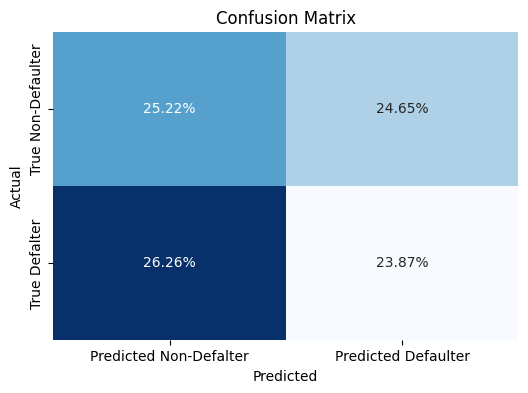

In [158]:
rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'oneSVM_rev_rbf')

              precision    recall  f1-score   support

           0       0.46      0.52      0.49      4969
           1       0.45      0.39      0.42      4996

    accuracy                           0.46      9965
   macro avg       0.46      0.46      0.45      9965
weighted avg       0.45      0.46      0.45      9965



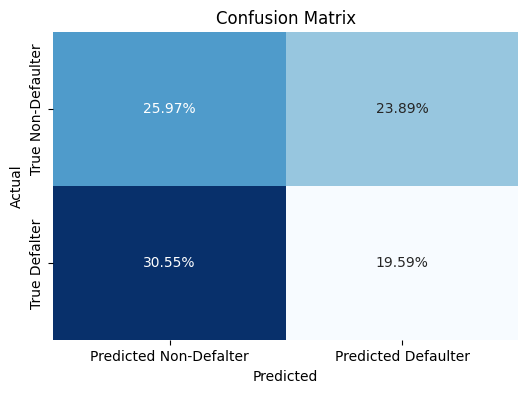

CPU times: user 8.89 s, sys: 123 ms, total: 9.01 s
Wall time: 9.04 s


In [159]:
%%time
## Polynomial Kernel
clf = OneClassSVM(kernel='poly', degree=3, gamma='auto').fit(xtrainOC_Scaled)

# Predicting on test data
ypred = clf.predict(xtest)
ypred[ypred == -1] = 0

rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'oneSVM_rev_poly3')

### Isolation Forest

In [160]:
%%time
# Isolation Forest for One Class
clf = IsolationForest(n_estimators=1000,random_state=SEED,n_jobs=-1).fit(xtrainOC_Scaled)

# Predicting on test data
ypred = clf.predict(xtest)
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1

CPU times: user 1.15 s, sys: 134 ms, total: 1.29 s
Wall time: 1.16 s


              precision    recall  f1-score   support

           0       0.50      0.72      0.59      4969
           1       0.49      0.27      0.34      4996

    accuracy                           0.49      9965
   macro avg       0.49      0.49      0.47      9965
weighted avg       0.49      0.49      0.47      9965



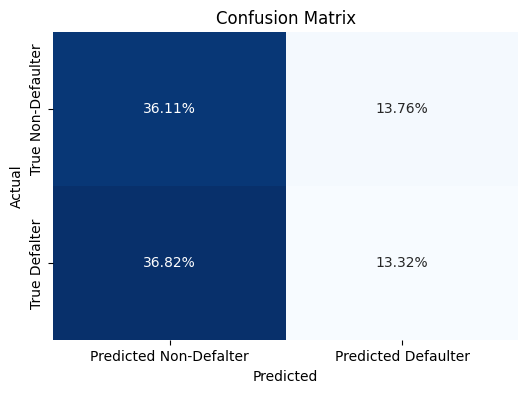

In [161]:
rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'IsoFor_rev')

In [162]:
modelRecord

,ModelName,testAccuracy,testF1,testPrecision,testRecall
0,oneSVM_rbf,0.531962,0.531380,0.532233,0.532061
1,oneSVM_poly3,0.513899,0.513549,0.514019,0.513975
2,SVM_lin,0.622679,0.622644,0.622770,0.622710
3,SVM_poly3,0.604917,0.604916,0.604930,0.604927
4,SVM_poly4,0.596588,0.595782,0.597200,0.596471
5,SVM_rbf,0.620070,0.619880,0.620406,0.620135
6,IsoFor,0.528249,0.504077,0.534250,0.527655
7,DecTre_vanilla,0.548319,0.548279,0.548371,0.548349
8,DecTre_depth100,0.548319,0.548279,0.548371,0.548349
9,oneSVM_rev_rbf,0.490918,0.490826,0.490950,0.490958


## Standard Classification

### SVM Series

In [163]:
%%time
# Supervised SVM

## Linear SVM
clf = SVC(kernel = 'linear')
clf.fit(xtrain,ytrain)

CPU times: user 2min 48s, sys: 1.78 s, total: 2min 49s
Wall time: 2min 50s


SVC(kernel='linear')

In [164]:
%%time
ypred = clf.predict(xtest)

CPU times: user 5.18 s, sys: 33.6 ms, total: 5.21 s
Wall time: 5.25 s


              precision    recall  f1-score   support

           0       0.62      0.63      0.63      4969
           1       0.63      0.61      0.62      4996

    accuracy                           0.62      9965
   macro avg       0.62      0.62      0.62      9965
weighted avg       0.62      0.62      0.62      9965



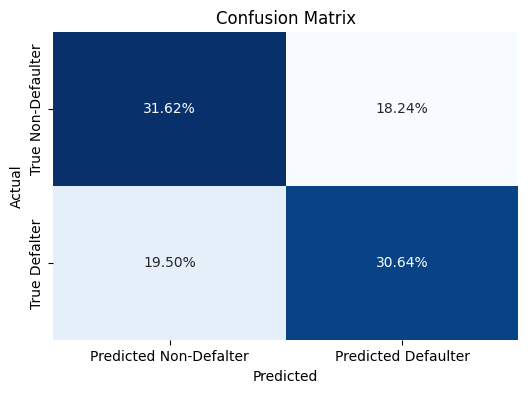

In [165]:
rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'SVM_lin')

In [166]:
modelRecord

,ModelName,testAccuracy,testF1,testPrecision,testRecall
0,oneSVM_rbf,0.531962,0.531380,0.532233,0.532061
1,oneSVM_poly3,0.513899,0.513549,0.514019,0.513975
2,SVM_lin,0.622579,0.622543,0.622671,0.622610
3,SVM_poly3,0.604917,0.604916,0.604930,0.604927
4,SVM_poly4,0.596588,0.595782,0.597200,0.596471
5,SVM_rbf,0.620070,0.619880,0.620406,0.620135
6,IsoFor,0.528249,0.504077,0.534250,0.527655
7,DecTre_vanilla,0.548319,0.548279,0.548371,0.548349
8,DecTre_depth100,0.548319,0.548279,0.548371,0.548349
9,oneSVM_rev_rbf,0.490918,0.490826,0.490950,0.490958


In [167]:
%%time

## Poly 3 SVM
clf = SVC(kernel = 'poly',degree=3)
clf.fit(xtrain,ytrain)

ypred = clf.predict(xtest)

CPU times: user 56.8 s, sys: 694 ms, total: 57.5 s
Wall time: 57.6 s


              precision    recall  f1-score   support

           0       0.60      0.61      0.61      4969
           1       0.61      0.60      0.60      4996

    accuracy                           0.60      9965
   macro avg       0.60      0.60      0.60      9965
weighted avg       0.60      0.60      0.60      9965



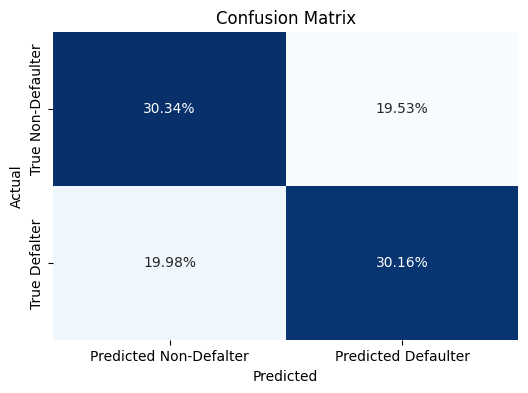

In [168]:
rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'SVM_poly3')

In [169]:
%%time

## Poly 4 SVM
clf = SVC(kernel = 'poly',degree=4)
clf.fit(xtrain,ytrain)

ypred = clf.predict(xtest)

CPU times: user 1min 22s, sys: 917 ms, total: 1min 23s
Wall time: 1min 23s


              precision    recall  f1-score   support

           0       0.60      0.55      0.58      4969
           1       0.59      0.64      0.61      4996

    accuracy                           0.60      9965
   macro avg       0.60      0.60      0.60      9965
weighted avg       0.60      0.60      0.60      9965



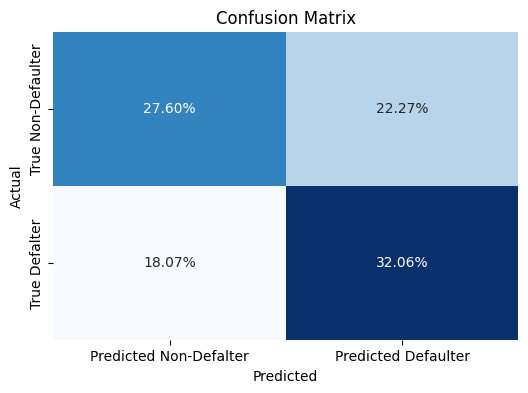

In [170]:
rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'SVM_poly4')

In [171]:
%%time
## RBF SVM
clf = SVC(kernel = 'rbf')
clf.fit(xtrain,ytrain)

ypred = clf.predict(xtest)

CPU times: user 59.5 s, sys: 436 ms, total: 60 s
Wall time: 60 s


              precision    recall  f1-score   support

           0       0.61      0.64      0.63      4969
           1       0.63      0.60      0.61      4996

    accuracy                           0.62      9965
   macro avg       0.62      0.62      0.62      9965
weighted avg       0.62      0.62      0.62      9965



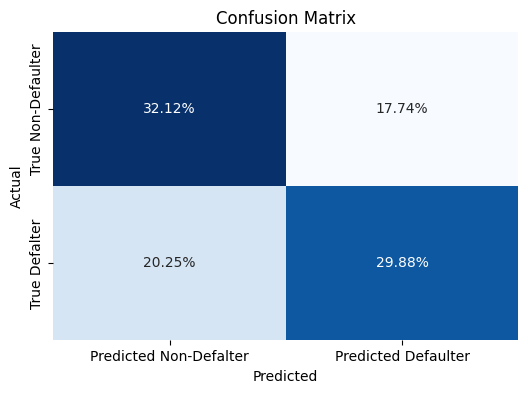

In [172]:
rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'SVM_rbf')

In [173]:
modelRecord

,ModelName,testAccuracy,testF1,testPrecision,testRecall
0,oneSVM_rbf,0.531962,0.531380,0.532233,0.532061
1,oneSVM_poly3,0.513899,0.513549,0.514019,0.513975
2,SVM_lin,0.622579,0.622543,0.622671,0.622610
3,SVM_poly3,0.604917,0.604916,0.604930,0.604927
4,SVM_poly4,0.596588,0.595782,0.597200,0.596471
5,SVM_rbf,0.620070,0.619880,0.620406,0.620135
6,IsoFor,0.528249,0.504077,0.534250,0.527655
7,DecTre_vanilla,0.548319,0.548279,0.548371,0.548349
8,DecTre_depth100,0.548319,0.548279,0.548371,0.548349
9,oneSVM_rev_rbf,0.490918,0.490826,0.490950,0.490958


### Tree Series

In [174]:
%%time
# Vanilla Decision Tree
clf = DecisionTreeClassifier(random_state=SEED).fit(xtrain,ytrain)
ypred = clf.predict(xtest)

CPU times: user 530 ms, sys: 3.78 ms, total: 534 ms
Wall time: 533 ms


              precision    recall  f1-score   support

           0       0.54      0.55      0.55      4969
           1       0.55      0.54      0.54      4996

    accuracy                           0.54      9965
   macro avg       0.54      0.54      0.54      9965
weighted avg       0.54      0.54      0.54      9965



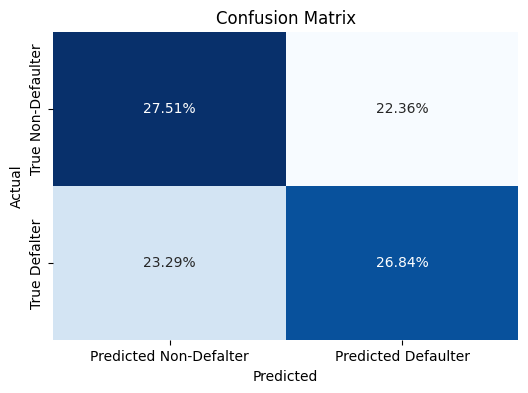

In [175]:
rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'DecTre_vanilla')

In [81]:
%%time
# Decision Tree Depth 100
clf = DecisionTreeClassifier(max_depth = 100, random_state=SEED).fit(xtrain,ytrain)
ypred = clf.predict(xtest)

CPU times: user 538 ms, sys: 9.47 ms, total: 547 ms
Wall time: 565 ms


              precision    recall  f1-score   support

           0       0.54      0.55      0.55      4969
           1       0.55      0.54      0.54      4996

    accuracy                           0.54      9965
   macro avg       0.54      0.54      0.54      9965
weighted avg       0.54      0.54      0.54      9965



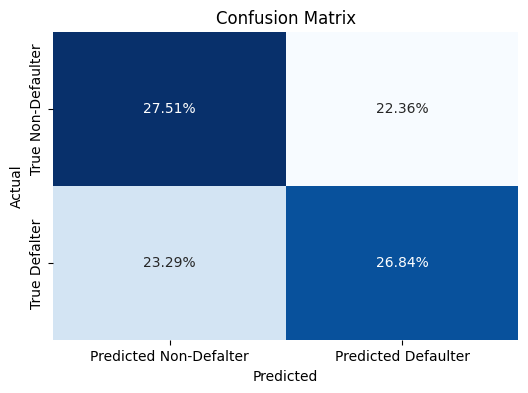

In [82]:
rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'DecTre_depth100')

In [83]:
%%time
# Random Forest Depth 5
clf = RandomForestClassifier(max_depth=5, random_state=0).fit(xtrain,ytrain)
ypred = clf.predict(xtest)

CPU times: user 1.75 s, sys: 24.8 ms, total: 1.78 s
Wall time: 1.78 s


              precision    recall  f1-score   support

           0       0.61      0.61      0.61      4969
           1       0.61      0.62      0.62      4996

    accuracy                           0.61      9965
   macro avg       0.61      0.61      0.61      9965
weighted avg       0.61      0.61      0.61      9965



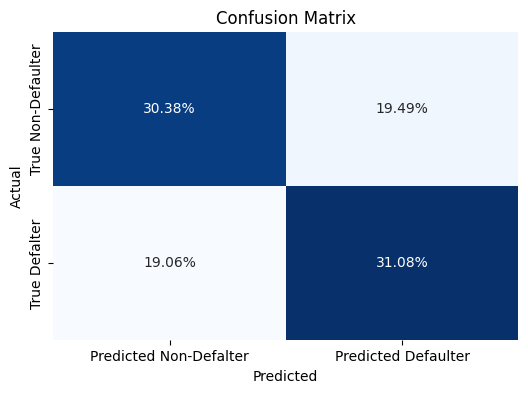

In [84]:
rep = resultAnalysisFnx(ytest,ypred)
# resultRecordFnx(rep,'DecTre_depth100')

In [86]:
%%time

# XGBoost Classifier

import xgboost as xgb

clf = xgb.XGBClassifier(n_estimators = 100).fit(xtrain,ytrain)
ypred = clf.predict(xtest)

CPU times: user 570 ms, sys: 156 ms, total: 726 ms
Wall time: 232 ms


              precision    recall  f1-score   support

           0       0.62      0.64      0.63      4969
           1       0.63      0.61      0.62      4996

    accuracy                           0.63      9965
   macro avg       0.63      0.63      0.63      9965
weighted avg       0.63      0.63      0.63      9965



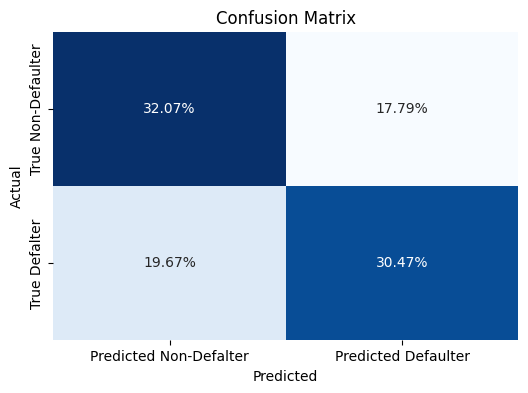

In [87]:
rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'XGB_nEst100')

              precision    recall  f1-score   support

           0       0.61      0.63      0.62      4969
           1       0.62      0.60      0.61      4996

    accuracy                           0.62      9965
   macro avg       0.62      0.62      0.62      9965
weighted avg       0.62      0.62      0.62      9965



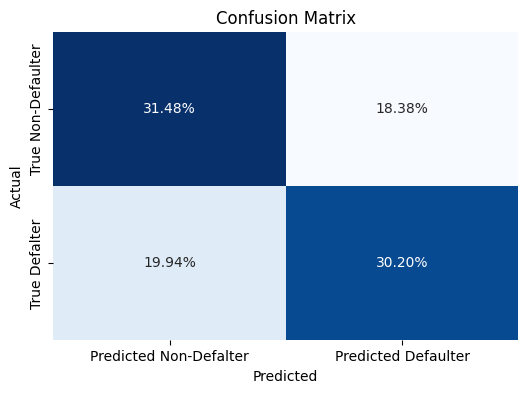

In [88]:
clf = xgb.XGBClassifier(n_estimators = 200).fit(xtrain,ytrain)
ypred = clf.predict(xtest)

rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'XGB_nEst200')

              precision    recall  f1-score   support

           0       0.61      0.64      0.62      4969
           1       0.62      0.60      0.61      4996

    accuracy                           0.62      9965
   macro avg       0.62      0.62      0.62      9965
weighted avg       0.62      0.62      0.62      9965



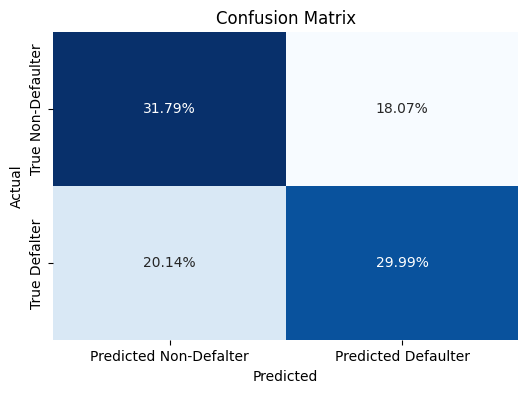

In [94]:
clf = xgb.XGBClassifier(n_estimators = 200,max_depth=20).fit(xtrain,ytrain)
ypred = clf.predict(xtest)

rep = resultAnalysisFnx(ytest,ypred)
resultRecordFnx(rep,'XGB_nEst200Depth20')

In [95]:
modelRecord.sort_values(by='testF1',ascending=False)

,ModelName,testAccuracy,testF1,testPrecision,testRecall
12,XGB_nEst100,0.625389,0.625292,0.625588,0.625437
2,SVM_lin,0.622579,0.622543,0.622671,0.622610
5,SVM_rbf,0.620070,0.619880,0.620406,0.620135
13,XGB_nEst200,0.617863,0.617739,0.618091,0.617916
14,XGB_nEst200Depth20,0.617863,0.617739,0.618091,0.617916
3,SVM_poly3,0.604917,0.604916,0.604930,0.604927
4,SVM_poly4,0.596588,0.595782,0.597200,0.596471
7,DecTre_vanilla,0.543502,0.543482,0.543535,0.543524
8,DecTre_depth100,0.543502,0.543482,0.543535,0.543524
0,oneSVM_rbf,0.531962,0.531380,0.532233,0.532061


## Neural Network

In [156]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

from sklearn.utils import shuffle

from torchinfo import summary

from tqdm import tqdm

In [157]:
xtrain.shape,xtest.shape

((39860, 40), (9965, 40))

### Model Creation

In [162]:
class NN_Model(nn.Module):
    def __init__(self):
        super(NN_Model, self).__init__()

        self.fc1 = nn.Linear(in_features=40,out_features=80)
        self.fc2 = nn.Linear(in_features=80,out_features=80)
        self.fc3 = nn.Linear(in_features=80,out_features=40)
        self.fc4 = nn.Linear(in_features=40,out_features=15)
        self.fc5 = nn.Linear(in_features=15,out_features=1)

    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        x = F.relu(x)

        x = self.fc4(x)
        x = F.dropout(x,p = 0.4)
        x = F.relu(x)

        x = self.fc5(x)
        x = torch.sigmoid(x)
        
        return x
        
model = NN_Model()

lr = 0.01
# criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

print(summary(model,input_size=(40,)))

Layer (type:depth-idx)                   Output Shape              Param #
NN_Model                                 [1]                       --
├─Linear: 1-1                            [80]                      3,280
├─Linear: 1-2                            [80]                      6,480
├─Linear: 1-3                            [40]                      3,240
├─Linear: 1-4                            [15]                      615
├─Linear: 1-5                            [1]                       16
Total params: 13,631
Trainable params: 13,631
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.92
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 0.06


In [159]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"PyTorch using device: {device}")

model.to(device)

PyTorch using device: cuda


NN_Model(
  (fc1): Linear(in_features=40, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=40, bias=True)
  (fc4): Linear(in_features=40, out_features=15, bias=True)
  (fc5): Linear(in_features=15, out_features=1, bias=True)
)

In [163]:
batchSize = 8
numEpochs = 50

batch_no = xtrain.shape[0] // batchSize

print(f"Number of Batches: {batch_no}")

Number of Batches: 4982


In [164]:
%%time
totLoss,totLossV = [],[]
totAcc,totAccV = [],[]

test_correct, test_total = 0, 0

for epc in range(numEpochs):
    model.train()

    xtrain, ytrain = shuffle(xtrain, np.array(ytrain))
    running_loss,correct,total = 0,0,0

    for btch in range(batch_no):
        start = btch * batchSize
        end = start + batchSize

        xbatch = torch.FloatTensor(xtrain[start:end])
        ybatch = torch.from_numpy(ytrain[start:end]).float()
        ybatch = ybatch.unsqueeze(1)

        xbatch, ybatch = xbatch.to(device), ybatch.to(device)

        optimizer.zero_grad()

        output = model(xbatch)
        loss = criterion(output, ybatch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total += ybatch.size(0)
        correct += sum(ybatch == torch.round(output)).item()

    if (epc+1)%10 == 0:
        print(f"Epoch {epc+1}/{numEpochs}, Loss: {running_loss/len(xtrain)}, Accuracy: {100 * correct/total}%")     

Epoch 10/50, Loss: 0.0866850661726017, Accuracy: 49.984945804897635%
Epoch 20/50, Loss: 0.086694189002929, Accuracy: 49.809313528703335%
Epoch 30/50, Loss: 0.08668844619559332, Accuracy: 49.917201926936976%
Epoch 40/50, Loss: 0.08668419646816043, Accuracy: 50.195704536330794%
Epoch 50/50, Loss: 0.0866885762715902, Accuracy: 49.96487354476114%
CPU times: total: 9min 53s
Wall time: 10min 3s


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4969
           1       0.50      1.00      0.67      4996

    accuracy                           0.50      9965
   macro avg       0.25      0.50      0.33      9965
weighted avg       0.25      0.50      0.33      9965



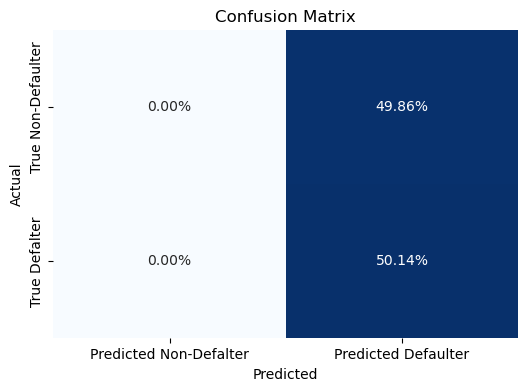

CPU times: total: 1.23 s
Wall time: 245 ms


In [165]:
%%time
with torch.no_grad():
    xtestTorch = torch.FloatTensor(xtest).to(device)
    ytestTorch = torch.from_numpy(np.array(ytest)).float().unsqueeze(1).to(device)
    output = model(xtestTorch)
    preds = torch.round(output).cpu().numpy().squeeze() 
    
rep = resultAnalysisFnx(np.array(ytest),preds)

In [166]:
resultRecordFnx(rep,'NN')

In [167]:
modelRecord

,ModelName,testAccuracy,testF1,testPrecision,testRecall
0,oneSVM_rbf,0.531962,0.531380,0.532233,0.532061
1,oneSVM_poly3,0.513899,0.513549,0.514019,0.513975
2,SVM_lin,0.622679,0.622644,0.622770,0.622710
3,SVM_poly3,0.604917,0.604916,0.604930,0.604927
4,SVM_poly4,0.596588,0.595782,0.597200,0.596471
5,SVM_rbf,0.620070,0.619880,0.620406,0.620135
6,IsoFor,0.528249,0.504077,0.534250,0.527655
7,DecTre_vanilla,0.548319,0.548279,0.548371,0.548349
8,DecTre_depth100,0.548319,0.548279,0.548371,0.548349
9,oneSVM_rev_rbf,0.490918,0.490826,0.490950,0.490958
